In [21]:
!pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 前期准备

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('speed_dating_train.csv', encoding='gbk')

### 数据整理

通过观察，我们不难发现，在这短短的两年中，这个实验的小酒馆经历了8000多场快速相亲的实验。

然后从数据的宽度来看，我们会发现一共有接近200个特征。然后我们再观察数据的完整度，看看是否有缺失数据。

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})
missing_value_df.sort_values(by='percent_missing')

,column_name,percent_missing
iid,iid,0.000000
dec_o,dec_o,0.000000
samerace,samerace,0.000000
match,match,0.000000
partner,partner,0.000000
...,...,...
amb7_2,amb7_2,76.658209
sinc7_2,sinc7_2,76.658209
expnum,expnum,78.482542
numdat_3,numdat_3,82.167452


通过以上代码，我们不难发现，其实还有很多的特征是缺失的。这一点在我们后面做分析和建模的时候，都需要关注到。因为一旦一个特征缺失的数据较多，就会导致分析误差变大或者模型过拟合/精度下降。看完数据的完整程度，我们就可以继续往下探索了。

### 数据分析

然后第一个问题就来了，在这8000多场的快速相亲中，到底有多少场相亲成功为参加的双方找到了合适的伴侣的？带着这个问题，我们就可以开始我们的第一个探索性数据分析。

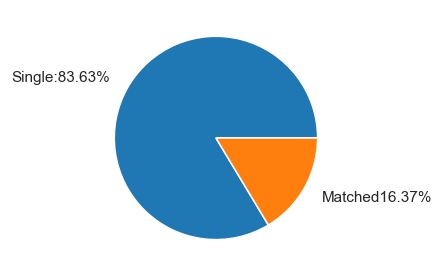

In [24]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df.match.value_counts().values

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2)
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2)
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']

# 创建饼图
plt.pie(
    size_of_groups,
    labels=names,
    labeldistance=1.2,
)
plt.show()

从上边的饼图我们可以发现，真正通过快速相亲找到对象的比率仅有16.47%。

然后我们就迎来了我们的第二个问题，这个比率和参加的人的性别是否有关呢？这里我们也通过Pandas自带的filter的方式来筛选数据集中的性别。通过阅读数据集的文档，我们知道0代表的是女生，1代表的是男生。然后同理，我们执行类似的代码来找出女生和男生分别在快速相亲中找到对象的几率的。

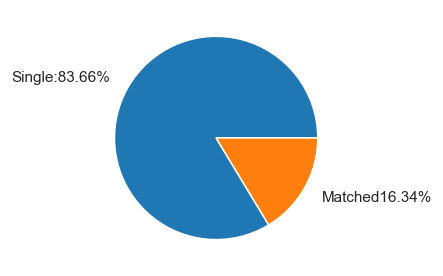

In [25]:
df[df.gender == 0]

# 多少女生通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df[df.gender == 0].match.value_counts().values # 男生只需要吧0替换成1即可

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2)
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2)
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']

# 创建饼图
plt.pie(
    size_of_groups,
    labels=names,
    labeldistance=1.2,
)
plt.show()

不难发现，在快速相亲中，女生相比于男生还是稍微占据一些优势的。女生成功匹配的几率比男生成功匹配的几率超出了0.04。

然后第二个问题来了：是什么样的人在参加快速相亲这样的活动呢？真的都是大龄青年（年龄大于30）嘛？这个时候我们就可以通过对参加人群的年龄分布来做一个统计分析。

Text(0, 0.5, 'Frequency')

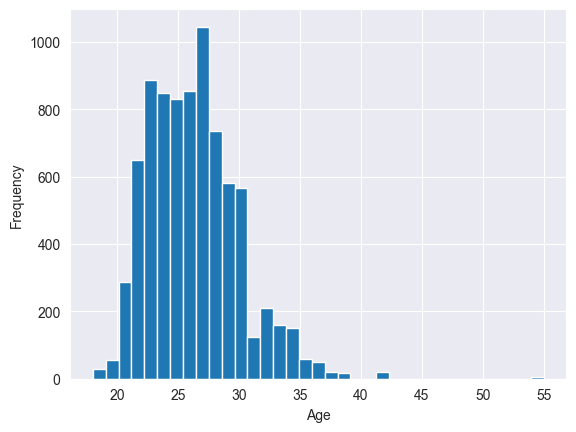

In [26]:
# 年龄分布
age = df[np.isfinite(df['age'])]['age']
plt.hist(age,bins=35)
plt.xlabel('Age')
plt.ylabel('Frequency')

不难发现，参加快速相亲的人群主要是22～28岁的群体。这点与我们的预期有些不太符合，因为主流人群并不是大龄青年。接下来的问题就是，年龄是否会影响相亲的成功率呢？和性别相比，哪个对于成功率的影响更大？这两个问题在本文就先埋下一个伏笔，不一一探索了，希望阅读文章的你能够自己探索。但是这里可以给出一个非常好用的探索相关性的方式叫做数据相关性分析。通过阅读数据集的描述，我已经为大家选择好了一些合适的特征去进行相关性分析。这里合适的定义是指：1. 数据为数字类型，而不是字符串等无法量化的值。2.数据的缺失比率较低。

<AxesSubplot:title={'center':'Correlation Heatmap'}>

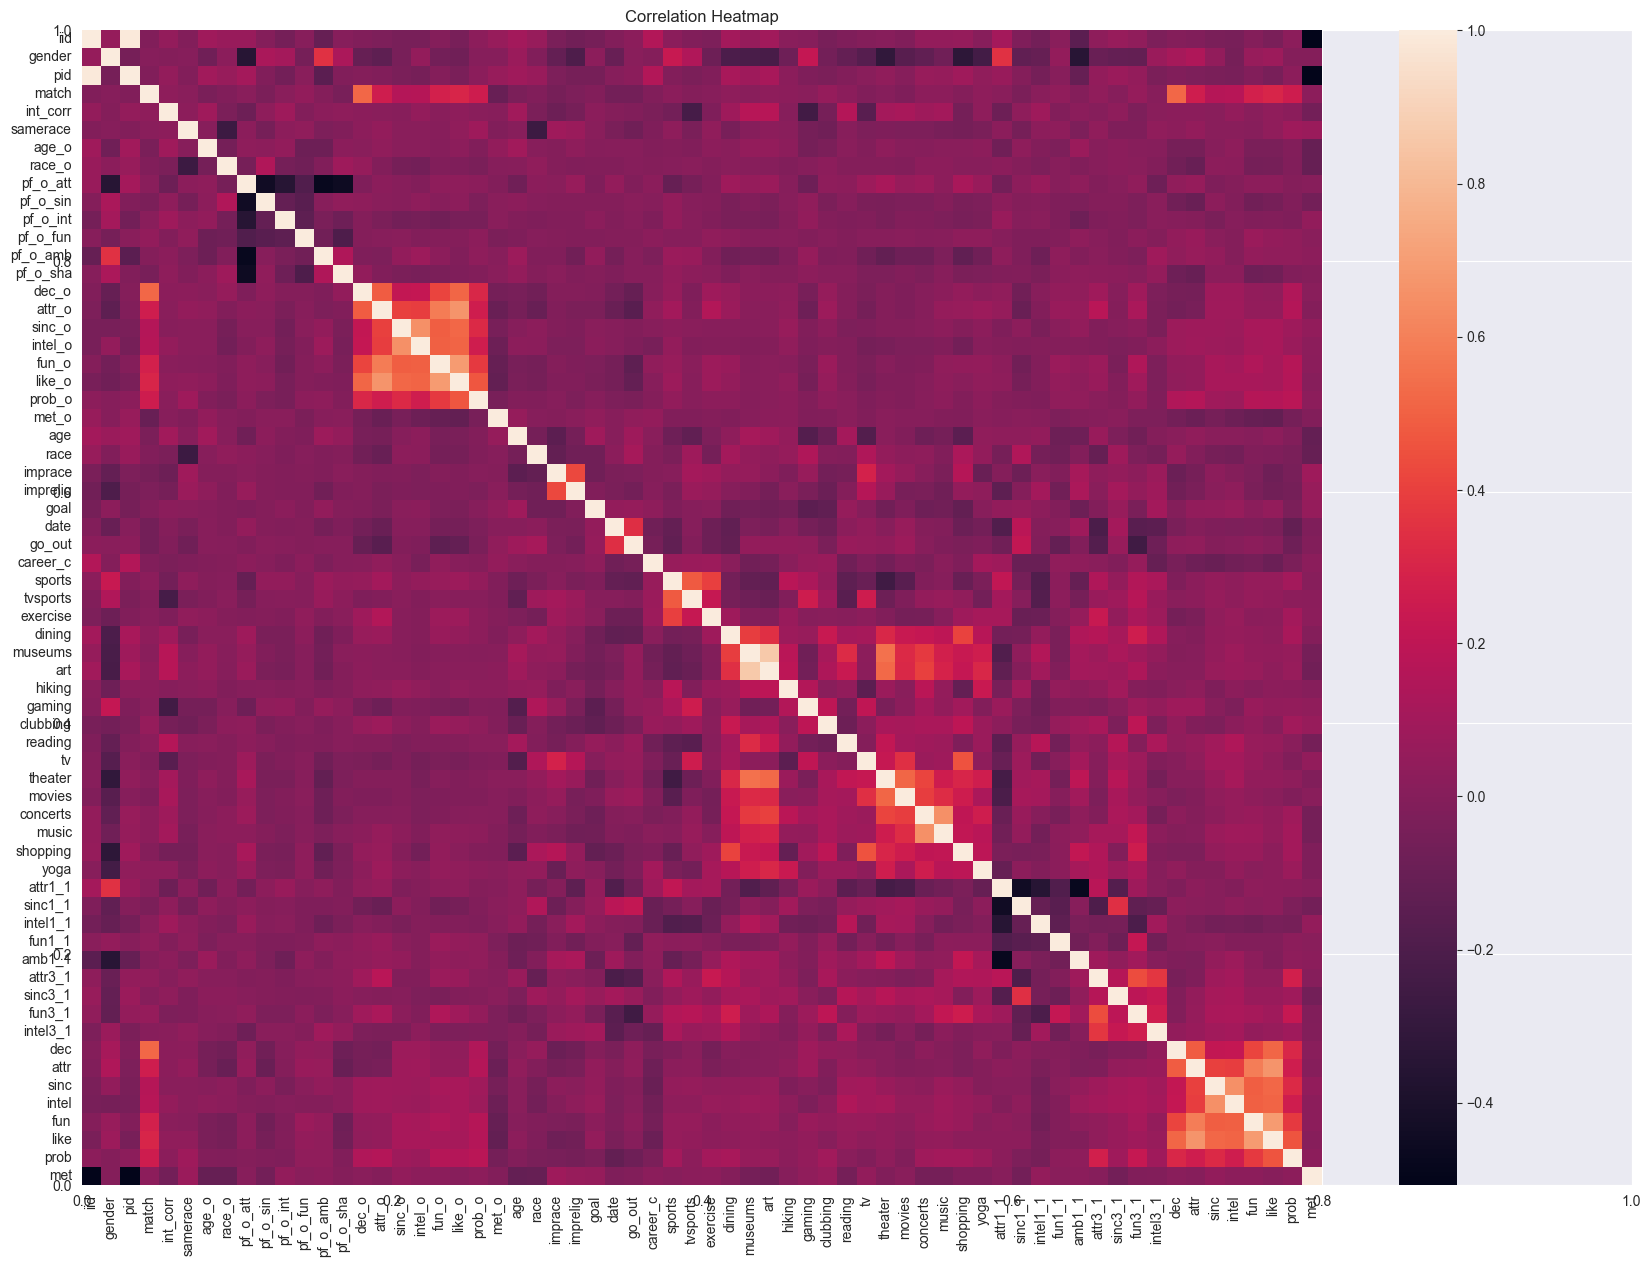

In [27]:
date_df = df[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
       'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
       'prob', 'met'
]]

# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

通过上面这张图这张相关性分析的热力图，我们可以先关注一些特别亮的和特别暗的点。比如我们可以发现，在 `pf_o_att` 这个表示相亲对象给出的外观吸引力这个特征上，和其他相亲对象给出的评分基本都是严重负相关的，除了 `pf_o_fun` 这一特征。由此我们可以推断出两个点：

1. 大家会认为外观更加吸引人的人在智商，事业心，真诚度上表现会相对较差。换句话说，可能就是颜值越高越浪
2. 幽默风趣的人更容易让人觉得外观上有吸引力

In [28]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [29]:
dating_test = pd.read_csv('speed_dating_test.csv', encoding='gbk')

date_df = df[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
    'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
    'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
    'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
    'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
    'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
    'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
    'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
    'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
    'prob', 'met'
]]

dating_test = dating_test[[
    'iid', 'gender', 'pid', 'int_corr', 'samerace', 'age_o',
    'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
    'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
    'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
    'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
    'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
    'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
    'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
    'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
    'prob', 'met'
]]
date_df.dropna(inplace=True)
dating_test = dating_test.fillna(0)
x = date_df.drop(columns=['match'])
y = date_df['match']

C:\Users\汪宾\AppData\Local\Temp\ipykernel_25212\236878610.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df.dropna(inplace=True)


In [30]:
# 做训练集和测试集分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
# logistic regression classification model
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
predict_train_lrc = model.predict(X_train)
predict_test_lrc = model.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))
predict_test = model.predict(dating_test)
print(predict_test)
np.savetxt('predict_test.csv', predict_test)

Training Accuracy: 1.0
Validation Accuracy: 0.9992553983618764
[0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0]
